In [1]:
#Importing all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Supress Warnings
import warnings 
warnings.filterwarnings('ignore')
#The last line of code helps in suppressing the unnecessary warnings.
from scipy import stats
import seaborn as sns

In [2]:
# Data Collection:
# Using the Specify Absolute Path: If the file is located in a different directory, you can specify the absolute path to the file when reading it using pd.read_csv():
import pandas as pd
file_path = r'C:\Users\User\Desktop\Thesis 2023\Capstone---CCT\Python Working Notebooks\ProductionDataupdated1.csv'
ProductionTank = pd.read_csv(file_path)

In [3]:
ProductionTank.head()

,Unnamed: 0,Material,BATCHID,Tank_1,Instruction_Step,INGRED_ID,INGRED_Name,Quantity,Phase_start,Phase_end,Phase_duration,Phase_start_delay,Phase_row_no,Flowrate_KGMIN,Target_Flowrate,Target_Phase_duration,Phase_overrun,Deaeration Phase
0,0,1002150,107643491,2503,S3_BATCH_IN_PROGRESS,NaN,NaN,0.000,09/03/2022 10:42,09/03/2022 10:42,0,0,1,0.0000,NaN,0,NaN,0
1,1,1002150,107643491,2503,STEP1_CONS,1002565,WATER TREATED,5760.000,09/03/2022 10:42,09/03/2022 11:16,34,0,2,169.4118,733.5050,8,26.0,0
2,2,1002150,107643491,2503,PLEASE VERIFY BULK ADDITION,NaN,NaN,0.000,09/03/2022 11:16,09/03/2022 11:17,1,0,3,0.0000,NaN,3,0.0,0
3,3,1002150,107643491,2503,STEP1_CONS,1037802,S813 SOD BENZOATE XFX25,5.629,09/03/2022 11:17,09/03/2022 11:27,10,0,4,0.5629,6.3182,1,9.0,0
4,4,1002150,107643491,2503,STEP1_CONS,1002818,S651 CITRIC ACID ANH BG XFX25,78.766,09/03/2022 11:27,09/03/2022 11:38,11,0,5,7.1605,6.3182,12,0.0,0


In [4]:
ProductionTank.drop(columns=['Unnamed: 0'], inplace=True)

In [5]:
# Define a dictionary of replacements
replacements = {
    'U_22MT01 ':'2201',
    'U_23MT01':'2301',
    'U_26MT02':'2602'  
}

# Replace values in the 'TankName' column
ProductionTank['Tank_1'].replace(replacements, inplace=True)

# Print the modified DataFrame
print(ProductionTank)

      Material    BATCHID Tank_1  \
0      1002150  107643491   2503   
1      1002150  107643491   2503   
2      1002150  107643491   2503   
3      1002150  107643491   2503   
4      1002150  107643491   2503   
...        ...        ...    ...   
9482   3055706  107737576   2502   
9483   3055706  107737576   2502   
9484   3055706  107737576   2502   
9485   3055706  107737576   2502   
9486   3055706  107737576   2502   

                                   Instruction_Step INGRED_ID  \
0                              S3_BATCH_IN_PROGRESS       NaN   
1                                        STEP1_CONS   1002565   
2                       PLEASE VERIFY BULK ADDITION       NaN   
3                                        STEP1_CONS   1037802   
4                                        STEP1_CONS   1002818   
...                                             ...       ...   
9482               TAKE A SAMPLE AND SUBMIT FOR QA.       NaN   
9483  SAMPLE TO LAB. RESULTS OK? (NO TO HOMOGEN

In [6]:
## 'STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION'  - Effect of Agitation

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


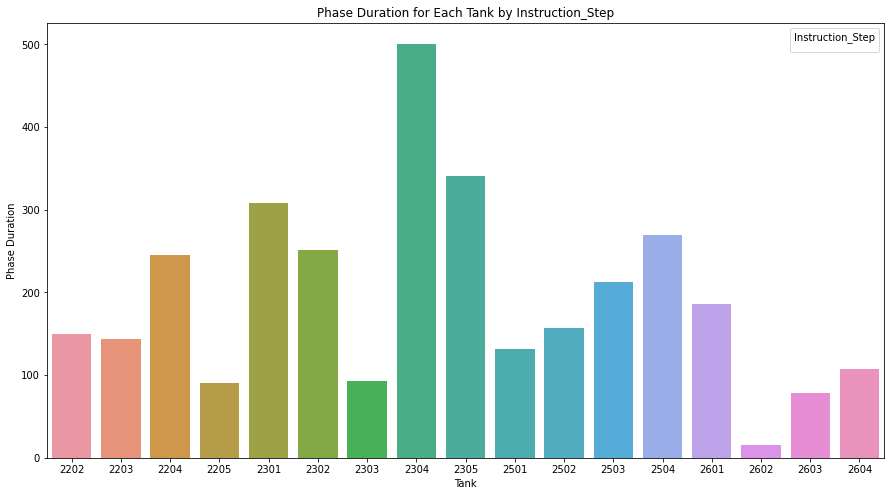

In [7]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Phase Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase Duration')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


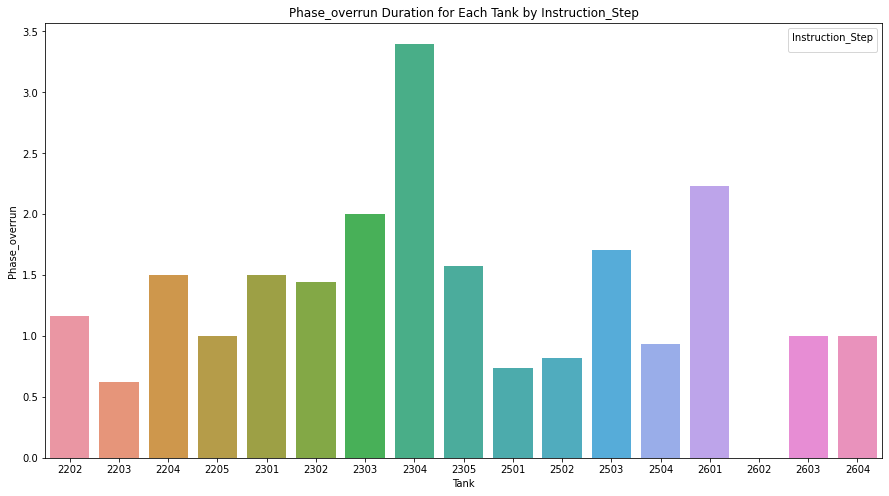

    Tank_1  Material    BATCHID  Phase_duration  Phase_overrun  \
0     2202   1397022  107956670              51            1.0   
1     2202   1428047  107993270              35            0.0   
2     2202   1428047  108033603              50            0.0   
3     2202   1451704  108073632              61            1.0   
4     2202   1520984  108045117              90            0.0   
..     ...       ...        ...             ...            ...   
333   2604   1974017  107642480              65            0.0   
334   2604   1985101  107599992              52            2.0   
335   2604   1985101  107759327              95            0.0   
336   2604   1985101  107956532              97            2.0   
337   2604   1985101  108081814              95            0.0   

     Phase_start_delay  Flowrate_KGMIN  Target_Phase_duration  Target_Flowrate  
0                    1             0.0              16.666667              NaN  
1                 3581             0.0       

In [19]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_overrun'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_overrun', ci=None)
plt.title('Phase_overrun Duration for Each Tank by Instruction_Step')
plt.ylabel('Phase_overrun')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'

#Aggregate data per tank
aggregated_total_durations_df1 = filtered_data.groupby(['Tank_1','Material','BATCHID']).agg({
    'Phase_duration': 'sum',
    'Phase_overrun': 'sum',
    'Phase_start_delay':'sum',
    #'Quantity':'sum',
    'Flowrate_KGMIN':'sum',
    'Target_Phase_duration':'mean',
    'Target_Flowrate':'mean'
}).reset_index()

 #Print the aggregated DataFrame
print(aggregated_total_durations_df1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


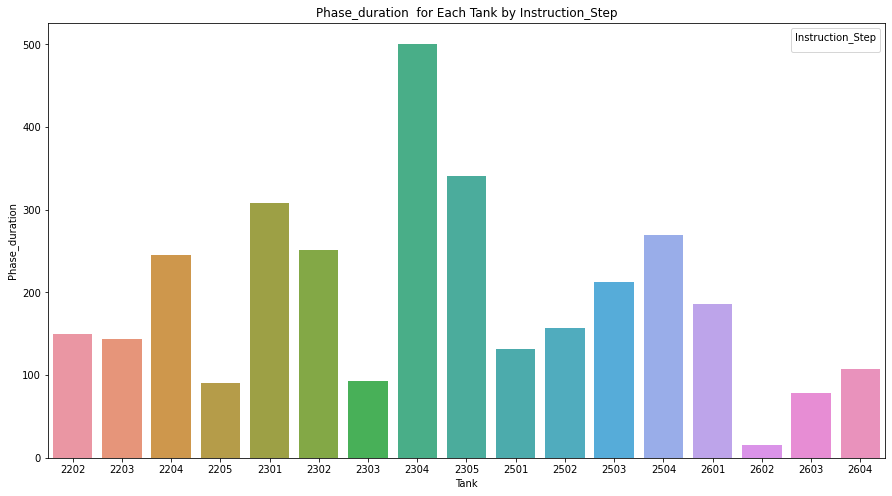

In [33]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_duration'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_duration', ci=None)
plt.title('Phase_duration  for Each Tank by Instruction_Step')
plt.ylabel('Phase_duration')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


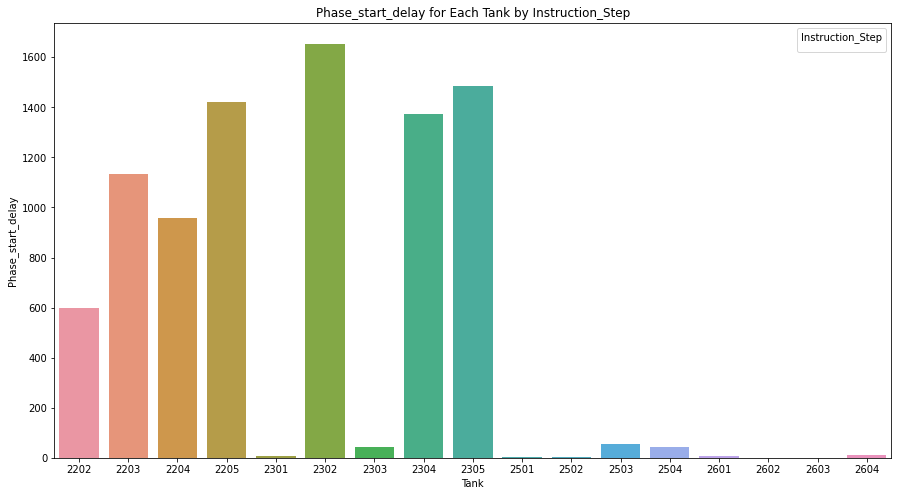

In [34]:
import pandas as pd
from tabulate import tabulate


data = pd.DataFrame(ProductionTank)


# Filter the dataframe for desired instruction steps
desired_steps = ['STEP1_AGITATION', 'STEP2_AGITATION','STEP3_AGITATION']

filtered_data = data[data['Instruction_Step'].isin(desired_steps)]

# Calculate total phase duration for each desired instruction step for each tank and material
total_durations = filtered_data.groupby(['Tank_1', 'Material'])['Phase_start_delay'].sum().reset_index()

# Present in table format
#print(tabulate(total_durations, headers='keys', tablefmt='grid'))

# Visualization using bar plots
plt.figure(figsize=(15, 8))
sns.barplot(data=total_durations, x='Tank_1', y='Phase_start_delay', ci=None)
plt.title('Phase_start_delay for Each Tank by Instruction_Step')
plt.ylabel('Phase_start_delay')
plt.xlabel('Tank')
plt.legend(title='Instruction_Step')
plt.show()
#'Instruction_Step'

